<a href="https://colab.research.google.com/github/eduvaladao/aulas_bigdata_astro_CBPF/blob/main/BayesianAnalysis_Cosmology_Strong_Lensing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://farm66.staticflickr.com/65535/49055715328_092031af74_o.png"  width="150" />

### CBPF - Centro Brasileiro de Pesquisas Físicas

# Bayesian Analysis with MCMC: Cosmology with Strong Lensing


This notebook will illustrate the basics of Bayesian analysis with MCMC (Markov Chain Monte Carlo) to obtain an estimate of the $\Omega_{m}$ parameter of Cosmology via Strong Lensing data.

**Author:** Eduardo da Costa Valadão

**Based on previous works by:** Clécio R. de Bom, Grasiele R. Bezerra, Renan Alves de Oliveira and Gabriel Crisnejo

**Contacts:** eduardovaladao98@gmail.com / debom@cbpf.br</font> / <a href="www.clearnightsrthebest.com">clearnightsrthebest.com</a>

<font size="2">

Please do not remove this disclaimer.</font>

# Inferência Bayesiana de Cosmologia em dados de Lenteamento Gravitacional Forte: Inferindo $\Omega_{m}$ num Background FLRW Plano

# Introdução: 

A Cosmologia é uma ciência delicada, de um lado precisamos de um bom arcabouço teórico capaz de descrever o Universo como um todo e do outro precisamos de dados observacionais confiáveis sem poder sair do lugar e sem poder usar uma abordagem estatística frequentista, já que só sabemos da existência de um Universo (por definição, já que Universo é sinônimo de toda a nossa realidade sensível) em que podemos confrontar nossos modelos. Uma das múltiplas soluções para esse problema é usar a chamada estatística Bayesiana e utilizar diferentes formas de se inferir a mesma coisa, este trabalho é um exemplo disto, pois estaremos estimando o parâmetro $\Omega_{m}$ da Cosmologia via uma análise Bayesiana de dados de Lenteamento Gravitacional Forte.  

# Estatística Bayesiana: 

A estatística bayesiana é a ideia de um método científico contemporâneo transportado para uma linguagem quantitativa, no sentido de que uma hipótese qualquer sobre um conjunto de fenômenos naturais se torna mais, ou menos, confiável, ou ainda mais apropriada do que uma outra hipótese, a medida que mais dados experimentais são levados em conta dentro desta abordagem. 

Uma análise bayesiana encapsula o cerne empirista da ciência, mas levando em conta a subjetividade/liberdade que se tem na construção de teorias e modelos físico-matemáticos. 

Enquanto numa abordagem frequentista os parâmetros de um modelo são considerados fixos e são estimados a partir de muitas amostras de uma população, tal que cada amostra resulta numa estimativa diferente e a distribuição dessas estimativas nos dá uma distribuição de probabilidades que quantifica a incerteza na estimativa desse parâmetro, na abordagem bayesiana os parâmetros de um modelo são tratados como variáveis aleatórias descritas por uma certa distribuição *a priori* que será atualizada para uma distribuição *a posteriori* ao ser confrontada com novos dados. 

Assim, probabilidades na abordagem frequentista estão associadas a uma frequência de eventos, isto é, a probabilidade de um evento acontecer é a mesma coisa que medir a proporção que esse evento acontece em experimentos, já as probabilidades na visão bayesiana estão associadas a um "grau de confiança" no evento. 

Isto tudo está resumido no Teorema de Bayes:

$$ P(modelo|dados) = \frac{P(dados|modelo)P(modelo)}{P(dados)},$$

em que $P(y|x)$ é uma probabilidade condicional e lê-se "a probabilidade de y acontecer dado que x já aconteceu". $P(modelo)$ é chamado de prior, $P(dados|modelo)$ de likelihood, P(dados) é a evidência bayesiana e $P(modelo|dados)$ é a posterior. 

Este teorema é interpretado como a atualização de uma crença/hipótese frente a dados experimentais. O prior representa uma crença, hipótese/conhecimento prévio ou até mesmo a posterior de outra análise bayesiana e não pode utilizar nenhuma das informações presentes nos dados que serão utilizados, a likelihood representa a probabilidade do nosso modelo gerar os dados observados e a evidência bayesiana é apenas uma fator de normalização quando não se está comparando modelos diferentes.

Logo, podemos fazer uma análise somente com base em:

$$ P(modelo|dados) \propto P(dados|modelo)P(modelo),$$

sempre lembrando que estamos tratando aqui de distribuições de probabilidade, isto é, funções de densidade de probabilidade.

# O modelo: 

Assumindo que o leitor saiba o mínimo de Cosmologia e Lentes Gravitacionais, precisamos de quatro ingredientes para construir o nosso modelo dentro da Relatividade Geral. Precisamos definir a Cosmologia, o formalismo de Lentes Gravitacionais de galáxia-galáxia, a dinâmica astrofísica da nossa galáxia-lente e levar em consideração questões observacionais: 

1. A nossa Cosmologia será a de Friedmann-Lemaître-Robertson-Walker (FLRW) plana e desconsideraremos a densidade de radiação, ou seja, $\Omega_K = \Omega_r = 0$ e $\Omega_m + \Omega_{\Lambda} = 1$. Dessa forma, a distância de diâmetro angular será dada por: 
$$ D_A = \frac{c}{H_0 (1 + z_{e})}\int_{z_r}^{z_e}\frac{dz}{\sqrt{\Omega_m (1 + z)^{3} + \Omega_{\Lambda}}}, $$

* $\Omega_i$ são os parâmetros de densidade normalizada do Universo atual da equação de Friedmann;
* $z_e$ é o redshift do objeto que emite a luz e $z_r$ é o redshift de quem recebe essa luz.

2. Pelo formalismo das lentes gravitacionais temos o raio angular de Einstein:
$$ \theta_E = \sqrt{\frac{4GM_E}{c^2}\frac{D_{LS}}{D_{OL}D_{OS}}}, $$

* $\theta_E$ é o raio angular do anel de Einstein, que acontece quando uma fonte está alinhada com uma lente axialmente simétrica quando vistas da Terra. É o parâmetro mais importante de qualquer lenteamento;
* $M_E$ é a massa da galáxia-lente contida dentro do raio de Einstein;
* $D_{LS}$ é a distância cosmológica de diâmetro angular entre a lente e a fonte, $D_{OS}$ entre observador e fonte e $D_{OL}$ entre observador e lente.

3. Para descrever a dinâmica dos componentes da nossa galáxia utilizamos a equação de Jeans, aonde queremos resolvê-la para encontrar a chamada dispersão de velocidades radial $\sigma_{r}$:
$$ \frac{d[\nu(r)\sigma_r^2(r)]}{dr} + \frac{2\beta}{r}\nu(r)\sigma_r^2(r) = -\nu(r)\frac{GM(r)}{r}, $$

* $\nu(r) \propto r^{-\delta}$ é o perfil de brilho da nossa galáxia, em que estamos assumindo que a relação entre a densidade no número de estrelas e a densidade de luminosidade estelar é espacialmente constante;
* $\beta = 1 - \sigma^2_t/\sigma_r^2$ é o parâmetro de anisotropia, que quantifica a diferença entre a dispersão de velocidades tangencial e radial assumindo simetria esférica e que assumimos ser constante; 
* $\sigma_r(r)$ é a componente radial de dispersão de velocidades, que quantifica a dispersão nas velocidades das estrelas de uma galáxia em torno da velocidade média dessa galáxia;
* $M(r)$ é o perfil de massa da nosas galáxia-lente, em que estamos assumindo que seu perfil de densidade seja 
$$ \rho(r) \propto r^{-\alpha}. $$ 


> Os parâmetros $\alpha$, $\beta$, $\delta$ e $\Omega_m$ serão os analisados pela nossa abordagem bayesiana, os 3 primeiros se referem a parte astrofísica e são chamados de parâmetros de nuisance e não podemos nos livrar deles. 

4. Em relação a parte observacional, podemos resolver as equações da astrofísica acima para obter que:

$$ \sigma_r^2 = \left[\frac{c^2}{4}\frac{D_{OS}}{D_{LS}}\theta_E\right]\frac{2}{\sqrt{\pi}\lambda(\alpha)(\xi - 2\beta)}\left(\frac{r}{R_E}\right)^{2 - \alpha}, $$

com $\xi = 2 - (\alpha + \delta)$, $GM_{E}/R_{E} = c^{2} D_{OS} \theta_{E} / 4 D_{LS}$, $R_{E} = D_{OL} \theta_{E}$ e $\lambda(x) = \Gamma((x-1)/2)/\Gamma(x/2)$. Essa equação descreve uma dispersão de velocidades de estrelas em 3 dimensões, mas como vemos as coisas projetadas no nosso céu temos que projetar isso em 2 dimensões, i.e., ao plano perpendicular a linha de visada.
 
Temos, então, que resolver:
$$ \sigma^2_{LOS} = \frac{1}{I(R)}\int^{\infty}_{-\infty}\nu(r)\sigma_r^2\left(1 - \frac{R^2}{r^2}\beta\right)dz $$
em que $r^2 = R^2 + z^2$ e $I(R) = \int^{\infty}_{-\infty}\nu(r)dz$ é o perfil de brilho projetado ao longo da linha de visada z (não confundir com o redshift). O resultado é então:
$$ \sigma^2_{LOS} = \frac{1}{I(R)}\left[\frac{c^2}{4}\frac{D_{OS}}{D_{LS}}\theta_E\right]\frac{2}{\sqrt{\pi}\lambda(\alpha)(\xi - 2\beta)}\left(\frac{1}{R_E}\right)^{2 - \alpha}\left[B\left(\frac{\xi - 1}{2}, \frac{1}{2}\right) - \beta B\left(\frac{\xi + 1}{2}, \frac{1}{2}\right)\right]R^{1 - \xi}. $$

Para considerar as condições observacionais, calculamos somente a média ponderada do resultado anterior:

$$
\left \langle \sigma^2_{LOS,*} \right \rangle = 
    \frac{\int_0^{\infty} \omega(R)I(R)\sigma^2_{LOS}(R) RdR }{\int_0^{\infty} \omega(R)I(R) RdR},$$

em que $\omega(R)$ é a "apperture weighting function", mas como estamos usando dados do SDSS podemos fazer que:

$$\omega(R) \approx e^{-R^2/2D_{OL}^{2}\tilde{\sigma}^2_{atm}},$$

tal que $\tilde{\sigma}^2_{atm} \approx \sigma^2_{atm} [1 + (1/4)(\theta_{ap}/\sigma_{atm})^2 + (1/40)(\theta_{ap}/\sigma_{atm})^4]$, $\sigma_{atm}$ é o seeing e $\theta_{ap}$ é o raio da abertura da fibra de espectroscopia.

O resultado final é:

$$\left \langle \sigma^2_{LOS,*} \right \rangle = \left[\frac{c^2}{4}\frac{D_{OS}}{D_{LS}}\theta_E\right] \frac{2}{\sqrt{\pi}\lambda(\alpha)(\xi - 2\beta)}
   \frac{\left [ \lambda(\xi) - \beta\lambda(\xi + 2) \right ]}{\lambda(\delta)}
   \left(\frac{2\tilde{\sigma}^2_{atm}}{\theta_E^2}\right)^{(2-\alpha)/2} 
   \frac{\Gamma\left ( \frac{3 - \xi}{2} \right )}{\Gamma\left ( \frac{3 - \delta}{2} \right )}$$
   
Tomando a raiz quadrada dessa expressão nós obtemos o nosso modelo que irá na análise bayesiana: 

$$ \bar{\sigma_*} = \sqrt{\left \langle \sigma^2_{LOS,*} \right \rangle} = \bar{\sigma_*}(\theta_E, z_l,z_s, \theta_{ap}, \sigma_{atm}, \alpha, \beta, \delta, \Omega_{m}), $$

em que $\theta_E, z_l,z_s, \theta_{ap}$ e $\sigma_{atm}$ são os observáveis presentes nos nossos dados e $\alpha, \beta$ e $\delta$ são os parâmetros astrofísicos do nosso modelo e $\Omega_{m}$ é o parâmetro que queremos medir e que entra nesta expressão através das distâncias de diâmetro angular.




Para mais informações, olhar em [Schwab2009](https://arxiv.org/abs/0907.4992) e [Cao2017](https://arxiv.org/abs/1701.00357).

# Necessary Python Packages:

In [1]:
import sys 
sys.path.append('../') 

!pip install emcee 
!pip install corner

import emcee 
import corner
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.optimize import minimize 
from scipy.optimize import curve_fit 

from astropy import constants as const 
from astropy import units as u 
from astropy.cosmology import FlatLambdaCDM 
from multiprocessing import Pool 

from IPython.display import display, Math
%matplotlib inline 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Defining the Cosmology:

In [2]:
print(const.c)
c = (const.c).to(u.km/u.second) 
clight = c.value 
print(clight)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018
299792.458


* Nesta seção definimos a distância de diâmetro angular, mas por praticidade escolhemos uma solução analítica aproximada desta. O integrando de $D_{A}$ foi expandido em série de Taylor até sétima ordem, neste caso o erro relativo com a expressão original fica abaixo de $\sim$5% para redshifts $z \lesssim 1.5$. Se o usuário preferir, pode trocar para a função que tem no astropy.

In [3]:
def func_z(omega_m, z):
    """ Integral of the angular diameter distance up to 7th order.
    Args:
        omega_m (float): cosmological normalized matter density parameter
        z (float): redshift
    Returns:
        float: taylor series up to 7th order of Integral[1/E(z)].
    """
    part1 = z - (3/4)*(omega_m)*(z**2)
    part2 = ((9/8)*(omega_m) - (1/2))*(omega_m)*(z**3) - ((135/64)*(omega_m**2) - (27/16)*(omega_m) + (1/8))*(omega_m)*(z**4)
    part3 = ((567/128)*(omega_m**2) - (81/16)*(omega_m) + (9/8))*(omega_m**2)*(z**5)
    part4 = - ((5103/512)*(omega_m**3) - (945/64)*(omega_m**2) + (45/8)*(omega_m) - (3/8))*(omega_m**2)*(z**6)
    part5 = ((24057/1024)*(omega_m**4) - (10935/256)*(omega_m**3) + (1485/64)*(omega_m**2) - (405/112)*(omega_m) + (3/56))*(omega_m**2)*(z**7)
    return part1 + part2 + part3 + part4 + part5 

def angular_diameter_distance(omega_m, zr, ze):
    """ Cosmological angular diameter distance up to 7th order.
    Args:
        omega_m (float): cosmological normalized matter density parameter
        zr (float): redshift of the observer receiving light (receiver)
        ze (float): redshift of the astrophysical object emitting light (emitter)
    Returns:
        float: taylor series up to 7th order of the angular diameter distance between zr and ze.
    """
    H0 = 67.4
    return (clight/H0)*(1/(1 + ze))*(func_z(omega_m, ze) - func_z(omega_m, zr))

# Functions of our Physical Model:

* Nesta seção estamos definindo o nosso modelo físico-observacional da dispersão de velocidades, como fora mencionado anteriormente na seção 'O modelo'.

In [4]:
def ratio_gamma(y, x):
    """ Ratio of different gamma functions.
    Args:
        y (float): parameter
        x (float): parameter
    Returns:
        float: ratio of gamma funcions.
    """
    return sp.special.gamma(y/2)/sp.special.gamma(x/2)

In [5]:
def ratio_gammax(x):
    """ Eq. (15) from arXiv:0907.4992v2
    Args:
        x (float): parameter
    Returns:
        float: ratio of gamma funcions.
    """  
    return ratio_gamma(x - 1, x)

In [6]:
def vel(z_S, z_L, theta_E, seeing_atm, theta_ap, alpha, beta, delta, omega_m):
    """ Eq. (23) from arXiv:0907.4992v2
    Args:
        z_S (float): source redshift
        z_L (float): lens redshift
        theta_E (float): Einstein angular radius (in radians)
        seeing_atm (float): Atmospheric seeing (in radians)
        theta_ap (float): Aperture size (in radians)
        alpha (float): power-law matter density profile index
        beta (float): anisotropy parameter
        delta (float): luminosity density profile index
        omega_m (float): cosmological normalized matter density parameter
    Returns:
        float: analytic model for velocity dispersion given observational conditions for SDSS.
    """

    # Angular diameter distances:
    DS = angular_diameter_distance(omega_m, np.zeros(len(z_S)), z_S)
    DL = angular_diameter_distance(omega_m, np.zeros(len(z_L)), z_L)
    DLS = angular_diameter_distance(omega_m, z_L, z_S)

    # \chi
    chi = theta_ap/seeing_atm

    # tilde_sigma = seeing_atm^tilde
    tilde_sigma = seeing_atm*np.sqrt(1 + (chi**2)/4 + (chi**4)/40) 

    ksi = alpha + delta - 2

    gamma = 1
    term_1 = (2/(1 + gamma))*((clight**2)/4)*(DS/DLS)*theta_E
    term_2 = 2/(np.sqrt(np.pi)*(ksi - 2*beta))
    term_3 = (ratio_gammax(ksi) - beta*ratio_gammax(ksi + 2))/(ratio_gammax(alpha)*ratio_gammax(delta))
    term_4 = (2*((tilde_sigma/theta_E)**2))**(1 - alpha/2)
    term_5 = ratio_gamma(3 - ksi, 3 - delta)

    sigma_star = term_1*term_2*term_3*term_4*term_5

    return np.sqrt(np.abs(sigma_star))

# Necessary Functions for Maximum Likelihood Estimation and Maximum A Posterior:

# Maximum Likelihood Estimation (MLE): 

Antes de entrarmos na análise bayesiana completa, podemos obter uma estimativa de $\Omega_{m}$ por uma abordagem frequentista chamada de máxima verossimilhança, que consiste em achar o máximo da nossa likelihood:

$$ P(\{\sigma_{SDSS,i}\}|\bar{\sigma_{*}}) = \prod_{i = 1}^{n \ dados} P(\sigma_{SDSS,i}|\bar{\sigma_{*}}), $$ 

mas podemos também tomar o logaritmo natural dessa expressão, já que o logaritmo natural é uma função monótona e os máximos são preservados. Se ainda tornarmos essa função negativa, poderemos então tomar o mínimo de:

$$ - lnP(\{\sigma_{SDSS,i}\}|\bar{\sigma_{*}}) = - \sum_{i = 1}^{n \ dados} ln P(\sigma_{SDSS,i}|\bar{\sigma_{*}}). $$ 

Podemos definir a likelihood como uma gaussiana que depende das múltiplas variáveis $\alpha$, $\beta$, $\delta$ e $\Omega_m$: 

$$ P(\sigma_{SDSS, i}|\bar{\sigma_*}) = \frac{1}{\sqrt{2\pi\varepsilon_{SDSS}^2 }}\exp\left[-\frac{(\sigma_{SDSS, i} - \bar{\sigma_*})^2}{2\varepsilon_{SDSS}^2}\right], $$ 

tal que $\sigma_{SDSS, i}$ é um dos nossos dados. Desta forma, achamos uma estimativa para os nossos quatro parâmetros ao encontrar o valor destas variáveis que minimiza a função:

$$ - lnP(\{\sigma_{SDSS,i}\}|\bar{\sigma_{*}}) = \frac{1}{2}\sum_{i = 1}^{n \ dados} \left[ln(2\pi\varepsilon_{SDSS,i}^2)  + \frac{(\sigma_{SDSS, i} - \bar{\sigma_*})^2}{\varepsilon_{SDSS,i}^2}\right].$$

Naturalmente, poderíamos resolver este problema ao simplesmente derivar a likelihood com relação a cada variável, igualar tudo a zero e dps resolver para esses parâmetros. No entanto, não há soluções analíticas para tal problema, logo vamos resolver tudo por métodos numéricos.

# Maximum A Posterior (MAP):  

Antes da análise bayesiana completa, podemos também estimar o máximo da nossa distribuição de probabilidades posterior. De maneira similar ao caso anterior, podemos fazer que: 

$$ P(\alpha, \beta, \delta, \Omega_{m}|\{\sigma_{SDSS,i}\}) \propto \prod_{i = 1}^{n \ dados} P(\sigma_{SDSS,i}|\bar{\sigma_{*}}) P(\alpha, \beta, \delta, \Omega_{m}), $$

tal que $P(\alpha, \beta, \delta, \Omega_{m}) = P(\alpha)P(\beta)P(\delta)P(\Omega_{m})$. Assim, tomando o logaritmo natural dessa expressão, obtemos que: 

$$ ln P(\alpha, \beta, \delta, \Omega_{m}|\{\sigma_{SDSS,i}\}) \propto lnP(\alpha) + lnP(\beta) + lnP(\delta) + lnP(\Omega_{m}) - \frac{1}{2}\sum_{i = 1}^{n \ dados} \left[ln(2\pi\varepsilon_{SDSS,i}^2)  + \frac{(\sigma_{SDSS, i} - \bar{\sigma_*})^2}{\varepsilon_{SDSS,i}^2}\right]. $$

Assim, basta minimizar o negativo dessa função para obter uma estimativa dos valores de parâmetros que maximizam a nossa posterior. 

Com relação as priors, existem dois tipos delas: as informativas e não informativas. As informativas em geral são as gaussianas posteriores marginalizadas obtidas por uma análise bayesiana em cima de outros dados ou experimento anterior, já as não informativas são as chamadas "flat priors" em que todos os valores de um parâmetro tem igual probabilidade de acontecer, isto é, $P(x) =  constante$.

As informativas são usadas para quando se quer atualizar seu conhecimento e confiança sobre um determinado modelo utilizando outros dados mais precisos, acurados ou somente oriundos de outra fonte. As flat priors são usadas quando não se quer introduzir nenhum viés de confirmação em cima de um determinado parâmetro a ser estimado, isto é, estimar algum parâmetro e ter como fonte somente os dados e suas hipóteses. A vantagem de usar priors informativas é a necessidade de poucos dados, um dos pontos fortes de uma análise bayesiana.

Neste trabalho, podemos utilizar priors gaussianas oriundas dos artigos [Schwab2009](https://arxiv.org/abs/0907.4992) e [Cao2017](https://arxiv.org/abs/1701.00357) para os parâmetros astrofísicos, mas para $\Omega_{m}$ podemos utilizar uma flat prior. No entanto, como ficará esclarecido depois, optamos por uma prior gaussiana oriunda de experimentos mais antigos e presente no artigo [Turner1998](https://arxiv.org/abs/astro-ph/9901168).

* Nesta seção estamos definindo a logprior, loglikelihood, logposterior e as funções para a minimização da likelihood e da posterior.

In [7]:
def sum_log_gaussian(model, data, error):
    """ Natural Logarithm of a Gaussian function. 
    Args:
        model (float): mean value
        error (float): standard deviation
        data (float): data values
    Returns:
        float: Sum of log of Gaussians through all data.
    """
    return -0.5*np.sum(np.log(2*np.pi*(error**2)) + ((data - model)**2)/(error**2))

In [8]:
def log_prior(theta, alpha_0, eps_alpha_0, beta_0, eps_beta_0, delta_0, eps_delta_0, omega_m_0, eps_omega_m_0):
    """ Gaussian priors.
    Args:
        theta (list): list of parameters [alpha, beta, delta, omega_m]
        alpha_0 (float): expected value for alpha
        eps_alpha_0 (float): variance of alpha
        beta_0 (float): expected value for beta
        eps_beta_0 (float): variance of beta
        delta_0 (float): expected value for delta
        eps_delta_0 (float): variance of delta
        omega_m_0 (float): expected value for omega_m
        eps_omega_m_0 (float): variance of omega_m
    Returns:
        float: Sum of log of priors for alpha, beta, delta and omega_m.
    """
    alpha, beta, delta, omega_m = theta
    n_sigma = 5
    if (alpha_0[0] - n_sigma*eps_alpha_0[0] < alpha < alpha_0[0] + n_sigma*eps_alpha_0[0]) and \
            (beta_0[0] - n_sigma*eps_beta_0[0] < beta < beta_0[0] + n_sigma*eps_beta_0[0]) and \
      (omega_m_0[0] - n_sigma*eps_omega_m_0[0] < omega_m < omega_m_0[0] + n_sigma*eps_omega_m_0[0]) and \
        (delta_0[0] - n_sigma*eps_delta_0[0] < delta < delta_0[0] + n_sigma*eps_delta_0[0]):
        log_prior_alpha = sum_log_gaussian(alpha_0, alpha, eps_alpha_0)
        log_prior_beta = sum_log_gaussian(beta_0, beta, eps_beta_0) 
        log_prior_delta = sum_log_gaussian(delta_0, delta, eps_delta_0)
        log_prior_omega_m = sum_log_gaussian(omega_m_0, omega_m, eps_omega_m_0)
        return log_prior_alpha + log_prior_beta + log_prior_delta + log_prior_omega_m
    else:
        return - np.inf

In [9]:
def log_likelihood(theta, z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap):
    """ log(Eq. (25)) from arXiv:0907.4992v2 
    Args:
        theta (list): list of parameters [alpha, beta, delta, omega_m]
        z_S (float): source redshift
        z_L (float): lens redshift
        velDisp (float): velocity dispersion
        velDispErr (float): velocity dispersion error (std. dev.)
        theta_E (float): Einstein angular radius (in radians)
        seeing_atm (float): Atmospheric seeing (in radians)
        theta_ap (float): Aperture size (in radians)
    Returns:
        float: Loglikelihood function given the model for velocity dispersion and the one measured.
    """
    alpha, beta, delta, omega_m = theta
    model = vel(z_S, z_L, theta_E, seeing_atm,
                theta_ap, alpha, beta, delta, omega_m)
    loglikelihood = sum_log_gaussian(model, velDisp, velDispErr)
    return loglikelihood

In [10]:
def log_posterior(theta, z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap,
                    alpha_0, eps_alpha_0, beta_0, eps_beta_0, delta_0, eps_delta_0, omega_m_0, eps_omega_m_0):
    """ Log of the posterior probability distribution of interest.
    Args:
        theta (list): list of parameters [alpha, beta, delta, omega_m]
        z_S (float): source redshift
        z_L (float): lens redshift
        velDisp (float): velocity dispersion
        velDispErr (float): velocity dispersion error (std. dev.)
        theta_E (float): Einstein angular radius (in radians)
        seeing_atm (float): Atmospheric seeing (in radians)
        theta_ap (float): Aperture size (in radians)
        alpha_0 (float): expected value for alpha
        eps_alpha_0 (float): variance of alpha
        beta_0 (float): expected value for beta
        eps_beta_0 (float): variance of beta
        delta_0 (float): expected value for delta
        eps_delta_0 (float): variance of delta
        omega_m_0 (float): expected value for omega_m
        eps_omega_m_0 (float): variance of omega_m
    Returns:
        float: Eq. (27) from arXiv:0907.4992v2
    """
    lp = log_prior(theta, alpha_0, eps_alpha_0, beta_0,
                   eps_beta_0, delta_0, eps_delta_0, omega_m_0, eps_omega_m_0)
    if not np.isfinite(lp):
        return - np.inf
    else:
        return lp + log_likelihood(theta, z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap)

In [11]:
def minimization_loglikelihood(z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap,
                               seed=42, alpha_ini=2.0, beta_ini=0.18, delta_ini=2.4, omega_m_ini=0.3):
    """ Maximization of Likelihood function.
    Args:
        z_S (float): source redshift
        z_L (float): lens redshift
        velDisp (float): velocity dispersion
        velDispErr (float): velocity dispersion error (std. dev.)
        theta_E (float): Einstein angular radius (in radians)
        seeing_atm (float): Atmospheric seeing (in radians)
        theta_ap (float): Aperture size (in radians)
        seed (float): random seed for reproducibility purposes. Default: 42.
        alpha_ini (float, optional): Initial guess for alpha. Default: 2.0.
        beta_ini (float, optional): Initial guess for beta. Default: 0.18.
        delta_ini (float, optional): Initial guess for delta. Default: 2.4.
        omega_m_ini (float, optional): Initial guess for omega_m. Default: 0.3.
    Returns:
        list: list of alpha, beta, delta and omega_m obtained from minimization of -loglikelihood function.
    """
    np.random.seed(seed)
    nll = lambda *args: -log_likelihood(*args)

    initial = np.array([alpha_ini, beta_ini, delta_ini, omega_m_ini]) + (1e-5)*np.random.randn(4)
    
    bnds = ((0, None), (0, None), (0, None), (0.01, 0.99))
    soln = minimize(nll, initial, args = (z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap, ), method='Nelder-Mead', bounds=bnds)
    alpha_ml, beta_ml, delta_ml, omega_m_ml = soln.x
    
    return float(alpha_ml), float(beta_ml), float(delta_ml), float(omega_m_ml)

In [12]:
def minimization_logposterior(z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap,
                                seed=42, alpha_ini=2.0, beta_ini=0.18, delta_ini=2.4, omega_m_ini=0.3,
                                alpha_0_value=2.0, eps_alpha_0_value=0.08,
                                beta_0_value=0.18, eps_beta_0_value=0.13,
                                delta_0_value=2.4, eps_delta_0_value=0.11,
                                omega_m_0_value=0.3, eps_omega_m_0_value=0.1):
    """ Maximization of Log Posterior Probability distribution function. 
    Args:
        z_S (float): source redshift
        z_L (float): lens redshift
        velDisp (float): velocity dispersion
        velDispErr (float): velocity dispersion error (std. dev.)
        theta_E (float): Einstein radius (in radians)
        seeing_atm (float): Atmospheric seeing (in radians)
        theta_ap (float): Aperture size (in radians)
        seed (float): random seed for reproducibility purposes. Defaults to 42.
        alpha_ini (float, optional): Initial guess for alpha. Defaults to 2.0.
        beta_ini (float, optional): Initial guess for beta. Defaults to 0.18.
        delta_ini (float, optional): Initial guess for delta. Defaults to 2.4.
        omega_m_ini (float, optional): Initial guess for omega_m. Defaults to 0.3.
        alpha_0_value (float, optional): expected value for alpha. Defaults to 2.0.
        eps_alpha_0_value (float, optional): variance for alpha. Defaults to 0.08.
        beta_0_value (float, optional): expected value for beta. Defaults to 0.18.
        eps_beta_0_value (float, optional): variance for beta. Defaults to 0.13.
        delta_0_value (float, optional): expected value for delta. Defaults to 2.4.
        eps_delta_0_value (float, optional): variance for delta. Defaults to 0.11.
        omega_m_0_value (float, optional): expected value for omega_m. Defaults to 0.3.
        eps_omega_m_0_value (float, optional): variance for omega_m. Defaults to 0.1.
    Returns:
        list: list of alpha, beta, delta and omega_m obtained from minimization of -logposterior function.
    """
    alpha_0 = np.repeat(alpha_0_value, len(z_S)) 
    eps_alpha_0 = np.repeat(eps_alpha_0_value, len(z_S))

    beta_0 = np.repeat(beta_0_value, len(z_S))
    eps_beta_0 = np.repeat(eps_beta_0_value, len(z_S))

    delta_0 = np.repeat(delta_0_value, len(z_S))
    eps_delta_0 = np.repeat(eps_delta_0_value, len(z_S))

    omega_m_0 = np.repeat(omega_m_0_value, len(z_S))
    eps_omega_m_0 = np.repeat(eps_omega_m_0_value, len(z_S))

    np.random.seed(seed)
    nll_2 = lambda *args: -log_posterior(*args) 
    initial = np.array([alpha_ini, beta_ini, delta_ini, omega_m_ini]) + 1e-5*np.random.randn(4) 
    
    soln_2 = minimize(nll_2, initial, args=(z_S, z_L, velDisp, velDispErr, theta_E,
                      seeing_atm, theta_ap, alpha_0, eps_alpha_0, beta_0, eps_beta_0, delta_0, eps_delta_0, omega_m_0, eps_omega_m_0, ), method='Nelder-Mead') 
    alpha_ml2, beta_ml2, delta_ml2, omega_m_ml2 = soln_2.x 

    return float(alpha_ml2), float(beta_ml2), float(delta_ml2), float(omega_m_ml2)

# Necessary Function for Bayesian Analysis:

* Para fazer uma análise bayesiana completa é necessário avaliar como a posterior varia em todo o espaço de parâmetros, como estamos no caso multidimensional, não há em geral uma solução analítica para tal. Assim, é necessário usar uma técnica numérica especial chamada de Markov Chain Monte Carlo (MCMC), sobre a qual explicaremos mais abaixo, utilizando a biblioteca emcee. As funções abaixo estão relacionadas a este tipo de análise.

In [13]:
def logposterior_sampling(z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap,
                            seed=42, alpha_ini=2.0, beta_ini=0.18, delta_ini=2.4, omega_m_ini=1.0,
                            alpha_0_value=2.0, eps_alpha_0_value=0.08,
                            beta_0_value=0.18, eps_beta_0_value=0.13,
                            delta_0_value=2.4, eps_delta_0_value=0.11,
                            omega_m_0_value=0.3, eps_omega_m_0_value=0.2,
                            n_dim=4, n_walkers=64, n_burn=500, n_steps=10000, progress=True, processes=1):
    """ Sampling logposterior probability distribution function with emcee.
    Args:
        z_S (float): source redshift
        z_L (float): lens redshift
        velDisp (float): velocity dispersion
        velDispErr (float): velocity dispersion error (std. dev.)
        theta_E (float): Einstein radius (in radians)
        seeing_atm (float): Atmospheric seeing (in radians)
        theta_ap (float): Aperture size (in radians)
        seed (float): random seed for reproducibility purposes. Defaults to 42.
        alpha_ini (float, optional): Initial guess for alpha. Defaults to 2.0.
        beta_ini (float, optional): Initial guess for beta. Defaults to 0.18.
        delta_ini (float, optional): Initial guess for delta. Defaults to 2.4.
        omega_m_ini (float, optional): Initial guess for omega_m. Defaults to 0.3.
        alpha_0_value (float, optional): expected value for alpha. Defaults to 2.0.
        eps_alpha_0_value (float, optional): variance for alpha. Defaults to 0.08.
        beta_0_value (float, optional): expected value for beta. Defaults to 0.18.
        eps_beta_0_value (float, optional): variance for beta. Defaults to 0.13.
        delta_0_value (float, optional): expected value for delta. Defaults to 2.4.
        eps_delta_0_value (float, optional): variance for delta. Defaults to 0.11.
        omega_m_0_value (float, optional): expected value for omega_m. Defaults to 0.3.
        eps_omega_m_0_value (float, optional): variance for omega_m. Defaults to 0.1.
        n_dim (int, optional): number of parameters in the model (r and p). Defaults to 4.
        n_walkers (int, optional): number of MCMC walkers. Defaults to 64.
        n_burn (int, optional): "burn-in" period to let chains stabilize. Defaults to 500.
        n_steps (int, optional): number of MCMC steps to take after burn-in. Defaults to 10000.
        progress (bool, optional): Show progress bar. Defaults to True.
        processes (int, optional): Number of processes in parallel. Defaults to 1.
    Returns:
        emcee object: samples from the posterior distribution.
    """
    alpha_0 = np.repeat(alpha_0_value, len(z_S))
    eps_alpha_0 = np.repeat(eps_alpha_0_value, len(z_S)) 

    beta_0 = np.repeat(beta_0_value, len(z_S))
    eps_beta_0 = np.repeat(eps_beta_0_value, len(z_S))

    delta_0 = np.repeat(delta_0_value, len(z_S))
    eps_delta_0 = np.repeat(eps_delta_0_value, len(z_S))

    omega_m_0 = np.repeat(omega_m_0_value, len(z_S))
    eps_omega_m_0 = np.repeat(eps_omega_m_0_value, len(z_S))
    
    with Pool(processes=processes) as pool:
        sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_posterior, args=(z_S, z_L, velDisp, velDispErr, theta_E,
                                                                                 seeing_atm, theta_ap, alpha_0,
                                                                                 eps_alpha_0, beta_0, eps_beta_0, delta_0, eps_delta_0, omega_m_0, eps_omega_m_0, ), pool=pool)
        np.random.seed(seed)
        solu = minimization_loglikelihood(z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap,
                                          seed, alpha_ini, beta_ini, delta_ini, omega_m_ini)
        p0 = solu + (1e-3)*np.random.randn(n_walkers, n_dim)

        # Run n_burn steps as a burn-in:
        print('Running burn-in ...')
        pos, prob, state = sampler.run_mcmc(p0, n_burn, progress=progress)

        # Reset the chain to remove the burn-in samples:
        sampler.reset()

        # Starting from the final position in the burn-in chain, sample for n_steps steps:
        print('Sampling ...')
        sampler.run_mcmc(pos, n_steps, rstate0=state, progress=progress)

    return sampler

In [14]:
def trace_plots(labels, samples, fig, axes, color, n_dim):
    """ Function that makes trace plots of the Markov chains.
    Args:
        labels (list, strings): labels of the plots
        samples (list, floats): samples from the MCMC
        fig (plt function): matplotlib function to define figures
        axes (plt function): matplotlib function to define axes ticks etc
        color (string or whatever): if it's string, all the trace_plots will have color = color. 
        If it's not, then will have multiple colors (each color for each walker chain)
        n_dim (integer): dimensions of parameter space
    Returns:
        plt figure: a trace plot for each parameter.
    """
    bla = 'string'
    for i in range(n_dim):
        ax = axes[i]
        if type(color) == type(bla):
            ax.plot(samples[:, :, i], color, alpha=0.3) 
        else: 
            ax.plot(samples[:, :, i])
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i], fontsize=14)     
        ax.yaxis.set_label_coords(-0.1, 0.5)

    axes[-1].set_xlabel("step number", fontsize=14);

# Mounting google drive and downloading strong lensing data:

* Nesta seção estamos pegando os dados de strong lensing do google drive local por meio do pandas, baixe estes arquivos do [meu github](https://github.com/eduvaladao/aulas_bigdata_astro_CBPF/blob/main/final_work/sample80.csv) ou utilize wget para pegá-los da web. 

* Esses dados foram utilizados no paper [Cao2017](https://arxiv.org/abs/1701.00357) e são oriundos das surveys SLACS, BELLS, LSD e SL2S.

In [15]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [16]:
data = pd.read_csv('/content/drive/MyDrive/sample80.csv') 
df = data.drop(["sigma_0", "dsigma_0"], axis = 1)
df2 = df.copy()  

# The column labels of the DataFrame:
df2.columns = ["id", "z<sub>lens</sub>", "z<sub>source</sub>", "\u03B8<sub>E</sub>", "\u03B8<sub>ap</sub>", 
              "\u03C3<sub>atm</sub>", "\u03C3<sub>SDSS</sub>","\u03B5<sub>SDSS</sub>"]
df2.iloc[0:20].style  

,id,zlens,zsource,θE,θap,σatm,σSDSS,εSDSS
0,J2321-0939,0.082000,0.532000,1.600000,1.500000,1.400000,249,8
1,J1106+5228,0.096000,0.407000,1.230000,1.500000,1.400000,262,13
2,J1143-0144,0.106000,0.402000,1.680000,1.500000,1.400000,269,13
3,J0841+3824,0.116000,0.657000,1.410000,1.500000,1.400000,225,11
4,J0044+0113,0.120000,0.196000,0.790000,1.500000,1.400000,266,13
5,J1213+6708,0.123000,0.640000,1.420000,1.500000,1.400000,292,15
6,J1451-0239,0.125000,0.520000,1.040000,1.500000,1.400000,223,14
7,J1218+0830,0.135000,0.717000,1.450000,1.500000,1.400000,219,11
8,J1134+6027,0.153000,0.474000,1.100000,1.500000,1.400000,239,12
9,J2303+1422,0.155000,0.517000,1.620000,1.500000,1.400000,255,16


* Podemos plotar esses dados de diferentes maneiras para ter uma visualização melhor do nosso dataset.

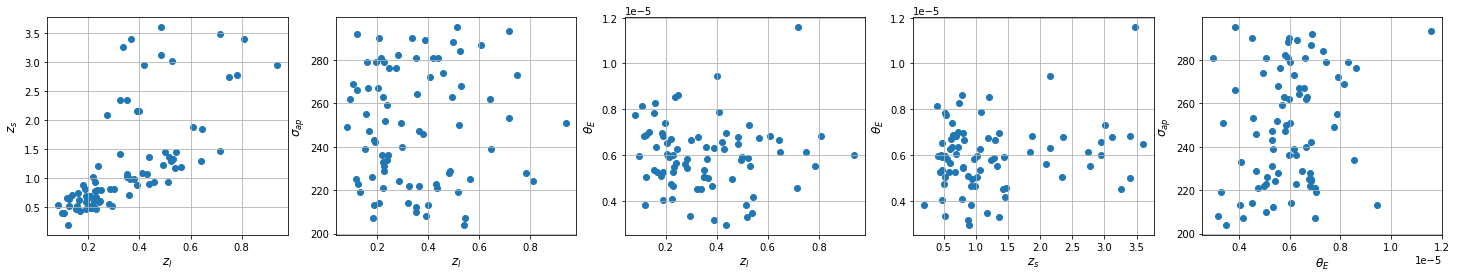

In [17]:
# About the data:
z_L1 = df['zl'].values 
z_S1 = df['zs'].values
theta_E1 = (df['theta_E'].values*u.arcsec).to(u.rad).value 
theta_ap1 = (df['theta_ap'].values*u.arcsec).to(u.rad).value
seeing_atm1 = (df['sigma_atm'].values*u.arcsec).to(u.rad).value
velDisp1 = df['sigma_ap'].values
velDispErr1 = df['d_sigma_ap'].values

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25,4))

lista1 = [z_L1, z_S1, velDisp1, theta_E1, z_S1, theta_E1, velDisp1]
lista2 = [r'$z_{l}$', r'$z_{s}$', r'$\sigma_{ap}$', r'$\theta_{E}$', r'$z_{s}$', r'$\theta_{E}$', r'$\sigma_{ap}$']

for i in range(6):
    if i + 1 < 4:
        axes[i].scatter(x = lista1[0], y = lista1[i+1]) 
        axes[i].set_xlabel(lista2[0], fontsize = 12)
        axes[i].set_ylabel(lista2[i+1], fontsize = 12)  
        axes[i].grid(True)
    elif i + 1 > 4:
        axes[i-1].scatter(x = lista1[i], y = lista1[i+1]) 
        axes[i-1].set_xlabel(lista2[i], fontsize = 12)
        axes[i-1].set_ylabel(lista2[i+1], fontsize = 12)
        axes[i-1].grid(True)

* Como estamos utilizando uma aproximação da distância de diâmetro angular, temos que cortar nosso dataset para manter somente os sistemas lente-fonte gravitacionais cuja galáxia-fonte esteja abaixo do redshift $z_{S} \sim 1.5$.

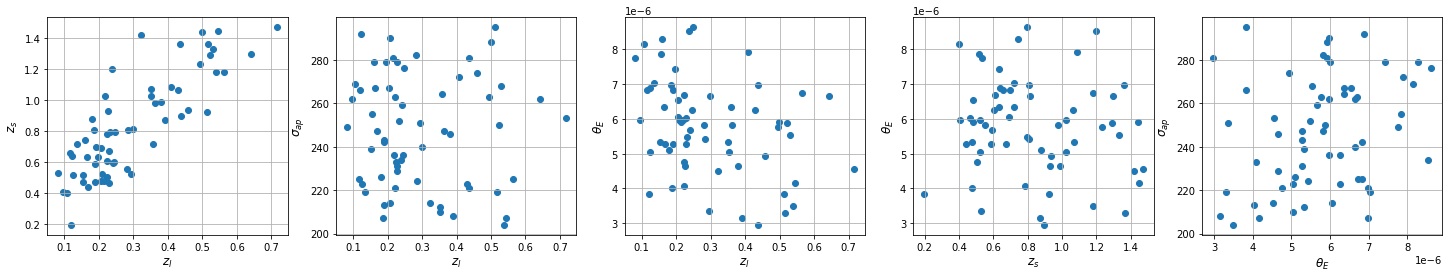

In [18]:
subdf = df[df['zs'] <= 1.500000]

z_L = subdf['zl'].values 
z_S = subdf['zs'].values
theta_E = (subdf['theta_E'].values*u.arcsec).to(u.rad).value 
theta_ap = (subdf['theta_ap'].values*u.arcsec).to(u.rad).value
seeing_atm = (subdf['sigma_atm'].values*u.arcsec).to(u.rad).value
velDisp = subdf['sigma_ap'].values
velDispErr = subdf['d_sigma_ap'].values

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25,4))

lista1 = [z_L, z_S, velDisp, theta_E, z_S, theta_E, velDisp]
lista2 = [r'$z_{l}$', r'$z_{s}$', r'$\sigma_{ap}$', r'$\theta_{E}$', r'$z_{s}$', r'$\theta_{E}$', r'$\sigma_{ap}$']

for i in range(6):
    if i + 1 < 4:
        axes[i].scatter(x = lista1[0], y = lista1[i+1]) 
        axes[i].set_xlabel(lista2[0], fontsize = 12)
        axes[i].set_ylabel(lista2[i+1], fontsize = 12)  
        axes[i].grid(True)
    elif i + 1 > 4:
        axes[i-1].scatter(x = lista1[i], y = lista1[i+1]) 
        axes[i-1].set_xlabel(lista2[i], fontsize = 12)
        axes[i-1].set_ylabel(lista2[i+1], fontsize = 12)
        axes[i-1].grid(True)

# Maximum Likelihood Estimation (MLE):

* Para a estimativa da Maximum A Posterior (MAP) estaremos utilizando gaussianas como priors com os valores de média e desvio padrão dados pelos valores abaixo. Esses valores podem ser encontrados em [Schwab2009](https://arxiv.org/abs/0907.4992) e [Turner1998](https://arxiv.org/abs/astro-ph/9901168).

* Frequentist approach, all priors are flat:

In [19]:
# About the parameters value and distribution:
mean_alpha = 1.96
var_alpha = 0.08
mean_beta = 0.18
var_beta = 0.13
mean_delta = 2.40
var_delta = 0.11
mean_omega_m = 0.4
var_omega_m = 0.1

omega_m = 0.3

X0 = minimization_loglikelihood(z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap, seed=42, alpha_ini=mean_alpha, beta_ini=mean_beta, delta_ini=mean_delta, omega_m_ini=omega_m)

In [20]:
print("The parameters that maximize the probability of observing the data given the model (the likelihood) are:\n")
print("\u03B1 = " + str(round(X0[0], 3)))
print("\u03B2 = " + str(round(X0[1], 3)))
print("\u03B4 = " + str(round(X0[2], 3)))
print("\u03A9\u2098 = " + str(round(X0[3], 3)))

The parameters that maximize the probability of observing the data given the model (the likelihood) are:

α = 1.836
β = 0.16
δ = 2.278
Ωₘ = 0.4


# Maximum A Posterior (MAP):

* Bayesian approach, updating our degree of belief in our physical model based on data (priors are updated to posteriors) and finding the parameters that maximize this posterior distribution:

In [21]:
X_param = minimization_logposterior(z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap, 
                                seed = 38, alpha_ini = mean_alpha, beta_ini = mean_beta, delta_ini= mean_delta, omega_m_ini = omega_m,  \
                                alpha_0_value = mean_alpha, eps_alpha_0_value = var_alpha, beta_0_value = mean_beta, eps_beta_0_value = var_beta,
                                                 delta_0_value=mean_delta, eps_delta_0_value=var_delta, omega_m_0_value = mean_omega_m, eps_omega_m_0_value = var_omega_m)

In [22]:
print("The parameters that maximize the probability of our model happens given the data (the posterior, according to Bayes Theorem) are:\n")
print("\u03B1 = " + str(round(X_param[0], 3)))
print("\u03B2 = " + str(round(X_param[1], 3)))
print("\u03B4 = " + str(round(X_param[2], 3)))
print("\u03A9\u2098 = " + str(round(X_param[3], 3)))

The parameters that maximize the probability of our model happens given the data (the posterior, according to Bayes Theorem) are:

α = 1.963
β = 0.188
δ = 2.39
Ωₘ = 0.401


# Markov Chain Monte Carlo (MCMC):

# MCMC: 

Numa análise bayesiana nem sempre é possível encontrar uma solução analítica para a distribuição de probabilidades posterior quando há muitos parâmetros num modelo, sendo necessário um algoritmo de cálculo numérico especial para isso: o Markov Chain Monte Carlo (MCMC).

O objetivo principal do MCMC é criar amostragens de distribuições de probabilidades, por exemplo, simular uma variável aleatória $x$ cuja distribuição de probabilidades é $P(x)$. 

De um lado temos o Monte Carlo que gera números aleatórios e do outro a chamada Markov Chain, que é uma sequência de números em que cada número gerado só depende do número imediatamente anterior. 

O MCMC faz uma cadeia de Markov ergódica (finita, irredutível e aperiódica) cuja distribuição limite é $P(x)$, essa cadeia é feita diversas vezes até convergir num estado que será a amostra da variável $x$. 

Para a amostra convergir para $P(x)$, é necessário um algoritmo do tipo: um valor $x_{t}$ gerado é aceito ou descartado com base numa regra, se for aceito, então mantém-se $x_{t}$, se for descartado, então um novo número $x'_{t}$ é criado unicamente a partir de $x_{t-1}$, que será então avaliado por essa regra novamente.

Para compreender o funcionamento do MCMC podemos fazer o uso da seguinte analogia: Um robô com um gerador de números aleatórios que dá 0 ou 1 quer mapear a superfície de uma montanha mas com ênfase no cume, ele começa de um lugar aleatório, se ele obter 0, deverá subir a montanha, já se ele obter 1, um novo número aleatório deverá ser gerado, se for 0 ele fica na mesma posição e se for 1 ele desce. Desta forma, toda a montanha é mapeada, mas a vizinhança do pico é melhor avaliada. 

O robô é o MCMC e a montanha é a nossa posterior, queremos explorar todo o espaço de parâmetros, mas queremos passar mais tempo nos modelos com maior probabilidade, i.e., nos melhores valores para os parâmetros.

* Abaixo se encontra uma função da biblioteca emcee que nos permite gerar a nossa amostragem de maneira bem simples, o n_walkers é o número de correntes que queremos gerar e que irão fazer uma "random walk".

In [23]:
seed = 42
np.random.seed(seed)

n_dim = 4         # number of parameters in the model 
n_walkers = 10    # number of MCMC walkers (let's start with ten walkers)

# An ensemble MCMC sampler:
sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_posterior, args = (z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap, 
                                                                                       np.repeat(mean_alpha, len(z_S)), np.repeat(var_alpha, len(z_S)),
                                                                                       np.repeat(mean_beta, len(z_S)), np.repeat(var_beta, len(z_S)), 
                                                                                       np.repeat(mean_delta, len(z_S)), np.repeat(var_delta, len(z_S)),
                                                                                       np.repeat(mean_omega_m, len(z_S)), np.repeat(var_omega_m, len(z_S))))

* Como valor inicial das cadeias de Markov é de costume utilizar as estimativas obtidas pela maximização da likelihood, que já obtivemos.

In [24]:
X0 = X0 + (1e-2)*np.random.randn(n_walkers, n_dim)

# Problemas do MCMC:

Infelizmente, há algumas questões que devemos considerar ao se produzir uma amostragem de uma variável aleatória com MCMC: Há uma dependência com os valores iniciais $X_{0}$ e há uma autocorrelação devido à cadeia de Markov. 

Em relação ao primeiro caso, podemos reduzir a influência do valor inicial $X_{0}$ ao descartar uma parte inicial da amostra, chamado de "burn-in period" ou "warm-up period", que é o tempo que as cadeias de Markov levam para se estabilizar sem ficar a deriva para cima ou para baixo. 

Com relação a autocorrelação, o emcee já faz essa análise automaticamente para nós. Nesses casos pode haver um problema de especificação do modelo e pode ser, sempre é, útil fazer uso do thinning. O thinning consiste em retirar valores da amostra em intervalos regulares, por exemplo, manter somente os valores de 50 em 50.


* Abaixo nós estamos gerando nossa amostra do período de burn-in, estamos usando 50 passos para a nossa caminhada aleatória.

In [25]:
n_burn = 50     # "burn-in" period to let chains stabilize.

Xn, prob, state = sampler.run_mcmc(X0, n_burn, progress = True)

100%|██████████| 50/50 [00:00<00:00, 238.21it/s]


* Aqui estamos gerando nossa amostra depois do período de burn-in, para avaliar como as cadeias de Markov estão se comportando.

In [26]:
n_steps = 1500    # number of MCMC steps to take after burn-in period.
sampler.reset()  

X, prob, state = sampler.run_mcmc(Xn, n_steps, rstate0 = state, progress = True)

100%|██████████| 1500/1500 [00:06<00:00, 228.08it/s]


* Com a nossa amostra inicial, queremos avaliar se as cadeias estão convergindo. Para tal, fazemos os chamados "trace plots", que nada mais são do que uma foto da caminhada aleatória dos 10 random walkers que escolhemos para cada um dos nossos 4 parâmetros que queremos criar uma amostragem para a nossa análise bayesiana. Podemos observar que aos poucos as cadeias vão parando de ficar a deriva e vão convergindo.

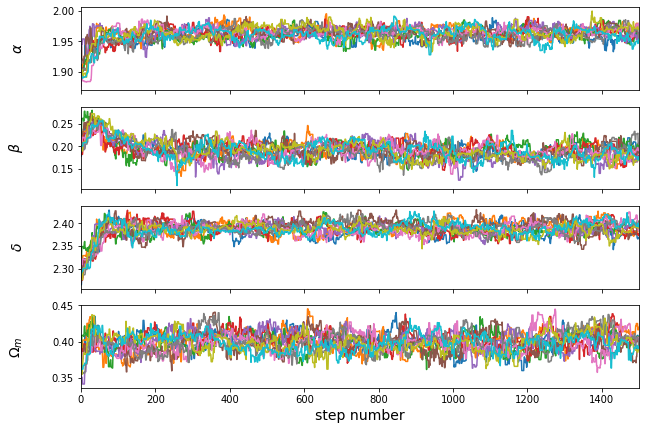

In [27]:
# Plotando as cadeias/correntes de Markov (Trace plots):
fig, axes = plt.subplots(n_dim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()  

labels = [r"$\alpha$", r"$\beta$", r"$\delta$", r"$\Omega_{m}$"]

trace_graf = trace_plots(labels, samples, fig, axes, 0, n_dim)

* Com essa análise inicial feita, queremos criar nossa amostra para valer. Para isso estamos utilizando a função logposterior_sampling que faz todo o trabalho duro a partir de funções da biblioteca emcee. Escolhemos aqui: 500 cadeias, 1500 passos de período de burn-in e 6500 passos a serem tomados por cada walker, ou seja, cada walker produz 6500 valores aleatórios. Isso tudo para criar uma amostra robusta com muitos valores, pouca correlação, pouca dependência do valor inicial e que convirja satisfatoriamente. (para o código rodar mais rápido, estamos o paralelizando)

In [28]:
n_dim = 4          # number of parameters in the model.
n_walkers = 500    # number of MCMC walkers.
n_burn = 1500      # "burn-in" period to let chains stabilize.
n_steps = 6500     # number of MCMC steps to take after burn-in.

sampler = logposterior_sampling(z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap, 
                            seed = seed, alpha_ini = mean_alpha, beta_ini = mean_beta, delta_ini = mean_delta, omega_m_ini = omega_m,  
                            alpha_0_value = mean_alpha, eps_alpha_0_value = var_alpha, beta_0_value = mean_beta, eps_beta_0_value = var_beta,
                            delta_0_value = mean_delta, eps_delta_0_value = var_delta,
                            omega_m_0_value = mean_omega_m, eps_omega_m_0_value = var_omega_m,
                            n_dim = n_dim, n_walkers = n_walkers, n_burn = n_burn, n_steps = n_steps, progress = True, processes = 10)

Running burn-in ...


100%|██████████| 1500/1500 [05:15<00:00,  4.75it/s]


Sampling ...


100%|██████████| 6500/6500 [23:05<00:00,  4.69it/s]


* Para analisar a estabilização das cadeias de Markov, fazemos os trace plots da nossa nova amostra. Esses gráficos de baixo mostram o que é um resultado bastante satisfatório para um MCMC.

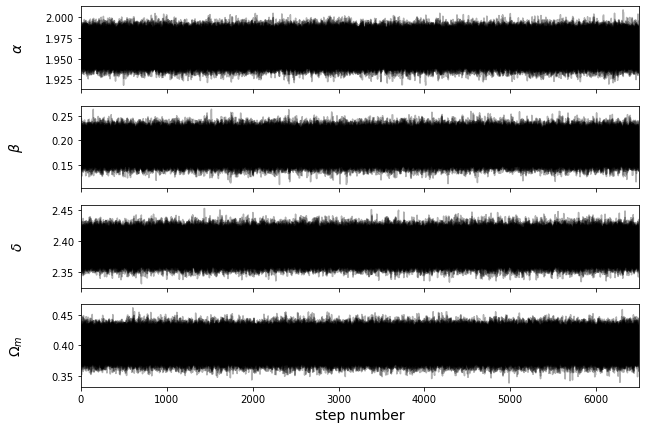

In [29]:
# Trace plots:
fig, axes = plt.subplots(n_dim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

labels = [r"$\alpha$", r"$\beta$", r"$\delta$", r"$\Omega_{m}$"]

tracegraf2 = trace_plots(labels, samples, fig, axes, "k", n_dim)

* Com o emcee podemos analisar a autocorrelação, o código abaixo mostra o número de passos (steps) que se deve tomar para que não exista autocorrelação nas cadeias de Markov para cada parâmetro. Ou seja, o período inicial de $\sim45$ steps tem que ser descartado.

In [30]:
sampler.get_autocorr_time()

array([43.70100208, 43.35372411, 43.60102284, 44.38541615])

# Plot of the multivariate distributions (posteriors):

# Corner Plots:

Os corner plots mostram todas as projeções 1D e 2D da distribuição de probabilidades posterior. Na diagonal principal, temos histogramas que são as distribuições marginalizadas de cada parâmetro de forma independente, e, fora da diagonal, temos contour plots que são as distribuições marginalizadas para cada par de parâmetros. Como não podemos ver gráficos em cinco dimensões espaciais, os corner plots são o que nos permitem visualizar a posterior. 

Uma distribuição marginalizada é quando se pega uma distribuição de probabilidades e se integra nos parâmetros que não são de interesse, por exemplo, o histograma no canto inferior direito abaixo é dado por: 

$$ P(\Omega_{m}|\{\sigma_{SDSS,i}\}) = \int P(\alpha, \beta, \delta|\{\sigma_{SDSS,i}\}) d\alpha d\beta d\delta, $$ 

aonde a integração é feita sobre todo o espaço paramétrico de ($\alpha$, $\beta$, $\delta$). Já o contour plot do lado inferior esquerdo é dado por: 

$$ P(\alpha, \Omega_{m}|\{\sigma_{SDSS,i}\}) = \int P(\beta, \delta|\{\sigma_{SDSS,i}\}) d\beta d\delta, $$ 

aonde a integração é feita sobre todo o espaço paramétrico de ($\beta$, $\delta$).

O mais interessante dos corner plots, é que eles nos dão uma ideia da covariância entre os parâmetros par a par, $(x,y)$. Quando algum contour plot for uma circunferência ou uma elipse não rotacionada, então os parâmetros em questão são independentes. No entanto, caso esse tipo de gráfico seja uma espécie de elipse inclinada em relação aos eixos cartesianos, então significa que as variáveis $x$ e $y$ são correlacionadas, isto é, y = f(x).

No entanto, por princípios da teoria, pode ser que $y$ seja totalmente independente de $x$. Dessa forma, esses gráficos nos indicam uma espécie de degenerescência entre duas variáveis que aparecem por má especificação do modelo, muitos graus de liberdade, poucos dados, dados não acurados, dados não precisos ou priors não informativas. Isto é, é possível modificar o par $(x,y)$ para $(x', y')$ e mesmo assim obter o modelo que foi criado com o par $(x, y)$.

Podemos ver uma correlação tipo "linear" entre a variável $\alpha$ e $\delta$, isto é, se $\alpha$ aumenta, $\delta$ também irá aumentar. Já com relação a variável $\Omega_m$ não existe correlação, pois utilizamos uma prior informativa e também existe o fato de que do lenteamento gravitacional é pouco sensível a esse parâmetro, como veremos mais abaixo.

* Nesta seção, estamos pegando as nossas cadeias de Markov (get_chain()) e descartando os primeiros 1000 valores. Além disso, estamos fazendo o thinning e pegando os valores de 50 em 50 steps. Por fim, estamos produzindo os famosos "corner plots", que são o ponto central de visualização e compreensão de uma análise bayesiana.

* Os valores presentes acima dos histogramas são as medianas de cada parâmetro (corresponde ao percentil de 50%) seguidos dos seus "desvios-padrões" (corresponde ao percentil de 15.85% para o valor negativo e 84.15% para o valor positivo).

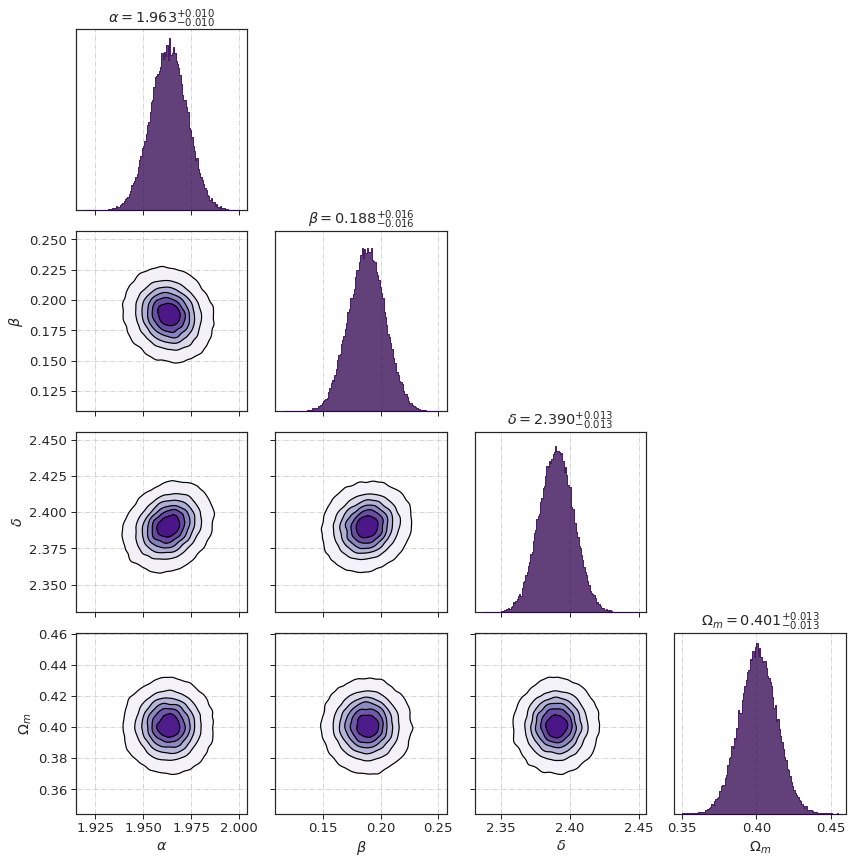

In [31]:
flat_samples = sampler.get_chain(discard=1000, thin=50, flat=True)

sns.set_style("ticks", {'grid.color': '.8', 'grid.linestyle': '-.', 'axes.grid': True})
sns.set_context("paper", font_scale=1.5, rc={'axes.linewidth': 1.2})

g = sns.PairGrid(data = pd.DataFrame(flat_samples, columns = labels), corner = True, height = 3, despine=False)  
g = g.map_diag(sns.histplot, element="step", fill=True, color = "#2e004d") 
g = g.map_lower(sns.kdeplot, fill=True, levels=7, cmap = "Purples") 
g = g.map_lower(sns.kdeplot, levels=7, color = "Black")

for i in range(len(labels)): 
    percentile =  np.percentile(flat_samples[:, i], [15.85, 50, 84.15])
    diff = np.diff(percentile)
    l = labels[i][:-1] + " = {0:.3f}^{{+{1:.3f}}}_{{-{2:.3f}}}$".format(percentile[1], diff[1], diff[0])
    g.axes[i][i].set_title(l)
    g.savefig('/content/drive/MyDrive/cornerplot_bayes_cosmology_one.pdf')

* Podemos ver nos gráficos acima que os dados basicamente confirmaram as priors gaussianas com as médias definidas anteriormente, e o que de fato atualizaram foram as correlações existentes entre certos parâmetros e aumentaram a precisão das nossas estimativas ao diminuir a largura das gaussianas.

* No entanto, se levarmos em consideração o valor estimado pelo *Planck* a partir da CMB de $\Omega_{m} = 0.315 \pm 0.007$, vemos que o nosso resultado é preciso mas não acurado. Há duas possíveis explicações para isso:

> 1. Nossos dados estão carregados de incertezas sistemáticas;
> 2. O lenteamento gravitacional é pouco sensível ao parâmetro $\Omega_{m}$.

Com relação ao item 1, isso já era de se esperar, já que esses parâmetros astrofísicos das lentes são cheios de sistemáticas envolvidas. Para aumentar a acurácia da estimativa seria necessário estimar o $\alpha$, $\beta$ e $\delta$ para cada lente de maneira independente. O melhor caso possível seria utilizar modelos mais complexos de densidade de matéria, de perfil de brilho e do parâmetro de anisotropia. Por exemplo, estimar como $\beta$ varia com o raio da galáxia (o que já está sendo feito pela Grasiele, aluna do prof. Martín Makler do CBPF) ou utilizar um perfil de Sérsic para fittar o brilho destas galáxias-lente. É sempre possível e mais difícil aumentar o nível de complexidade dessas modelagens, atualmente o João Paulo C. França, também aluno do prof. Martín, está focado nessas modelagens mais complexas. 

Com relação ao item 2, como já explicitado por [Schwab2009](https://arxiv.org/abs/0907.4992), a razão entre as distâncias de diâmetro angular presente no nosso modelo é pouco sensível a variações do parâmetro cosmológico $\Omega_{m}$ (ou $\Omega_{\Lambda}$). Se variarmos esse parâmetro de 0 a 1, a razão $D_{LS}/D_{OS}$ para cada sistema lente-fonte raramente passa de 10%. Isso gera alguns problemas, por exemplo, se colocarmos uma prior gaussiana com $0.3 \pm 0.1$, iremos obter uma estimativa para $\Omega_{m}$ em torno de 0.3 mas com maior precisão. Se usarmos $0.5 \pm 0.1$, teremos também algo em torno de 0.5 mas com incerteza menor. Dessa forma, este modelo e estes dados não nos trazem quase nenhuma acurácia em relação a esse parâmetro, é quase como se estivéssemos sempre melhorando o nosso viés. Isso fica mais claro quando analisamos uma flat prior: 

<img src="https://drive.google.com/uc?id=1l2YRSHyN7s6KHMTvRsXh0_YpVOuL3K1i" width="700" />

Essas deformidades nos gráficos abaixo explicitam a dificuldade com que o MCMC tem em explorar o espaço de parâmetros do nosso modelo dado a baixa e "estranha" dependência dele com $\Omega_{m}$, assim, quando fornecemos uma prior informativa, estamos dando mais informação ao MCMC para explorar o espaço paramétrico e esse problema some. 

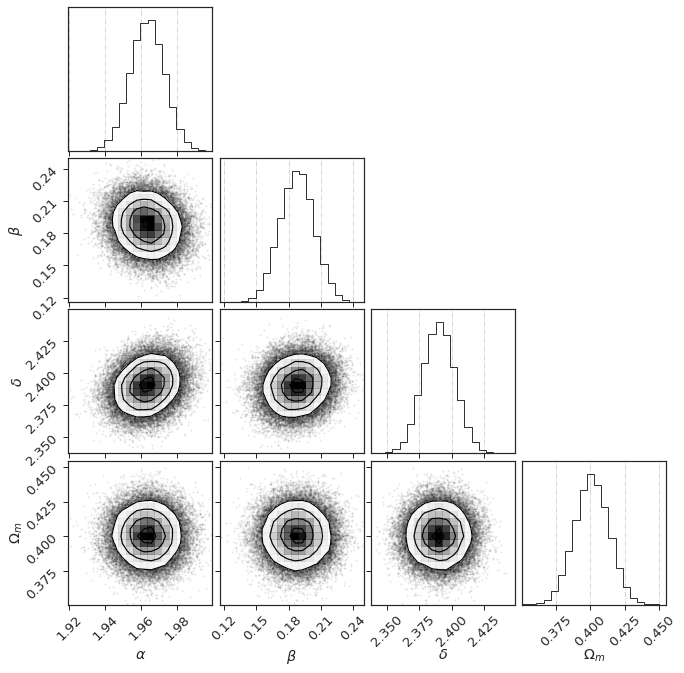

In [32]:
figure = corner.corner(flat_samples, labels=labels)
figure.savefig('/content/drive/MyDrive/cornerplot_bayes_cosmology_two.pdf')

# Fitting a Gaussian to $\Omega_{m}$ marginalized posterior:

* Por fim, podemos fittar uma gaussiana na nossa posterior marginalizada para $\Omega_{m}$ e obter uma estimativa para a média e desvio padrão dessa gaussiana.

In [33]:
def gaussian(x, mean, sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-((x - mean)**2)/(2.0*(sigma**2)))

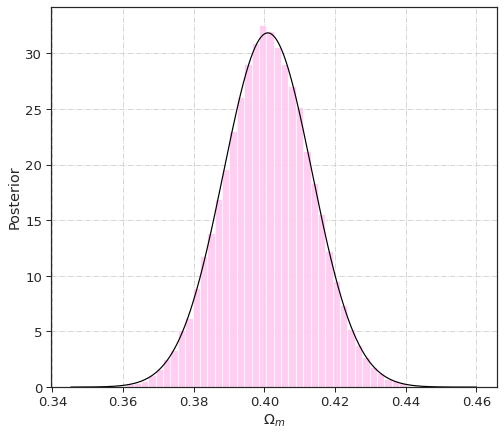

In [34]:
plt.figure(figsize= (8,7))
omega_m = flat_samples[:, 3]
bins = 50
g = sns.histplot(omega_m, bins=bins, alpha = .95, stat = "density", color = "#ffccf2") #f5e6ff
g.set_xlabel(r"$\Omega_m$")
g.set_ylabel(r"Posterior")

ax = g.get_children()
bin_height = []
bin_center = []
for i in range(bins):
    bin_height.append(ax[i].get_height())
    bin_center.append((ax[i].get_width()/2.0) + ax[i].get_x())

popt, pcov = curve_fit(gaussian, bin_center, bin_height, p0=[1., 0.5])

x_interval_for_fit = np.linspace(g.get_xlim()[0], g.get_xlim()[1], 10000)
sns.lineplot(x = x_interval_for_fit, y = gaussian(x_interval_for_fit, *popt), color = "Black")

In [35]:
print("This give us an estimation for an average value of \u03A9\u2098 and for its standard deviation:")

display(Math("\Omega_{m}" + " = {0:.3f}".format(popt[0])))
display(Math("\epsilon_{\Omega_{m}}" + "= {0:.3f}".format(abs(popt[1]))))

This give us an estimation for an average value of Ωₘ and for its standard deviation:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercícios: 

1. Faça a mesma análise bayesiana acima, mas para uma flat prior em $\Omega_{m}$. 

2. Faça a mesma análise acima, mas com mais dados em [meu github](https://github.com/eduvaladao/aulas_bigdata_astro_CBPF/blob/main/final_work/sample103.csv).

3. Faça a mesma análise acima, mas em cima do parâmetro $\Omega_{\Lambda}$ ao invés de $\Omega_{m}$.

# Referências:

1. [Schwab2009](https://arxiv.org/abs/0907.4992);

2. [Cao2017](https://arxiv.org/abs/1701.00357);

3. [Turner1998](https://arxiv.org/abs/astro-ph/9901168);

4. [Padilla2019](https://arxiv.org/abs/1903.11127);

5. [Grasiele2022](https://github.com/CosmoObs/legac_2022).